# Analysis of Complexity and Anger in Lale Gül *Ik ga leven*

We use the text of the 1st edition of the novel *Ik ga leven* by Lale Gül, which was published on 11 February 2021.

The text was divided into paragraphs and the last part (865 words of 100,612) was removed, as this part is a lengthy poem which we regard as too different in style to analyse in the same way as the body of the text.

GZip compression ratio (smaller is higher compression) was used to approximate Kolmogorov complexity. T-Scan was used to infer linguistic complexity counts per paragraph. LIWC 2015 was used to compute numbers for the LIWC categories 'anger' and 'negative motion' for each paragraph. All resulting numbers were combined in one csv file from which the further analysis in this notebook starts.

In [5]:
# Setup the needed tooling

import pandas
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Get the data

In [6]:
gul_data = pandas.read_csv( 'Lale_Gul-Ik_ga_leven_data.csv', index_col=0 )
gul_data

,Filename,negemo,anger,Segment,Zin_per_par,Wrd_per_par,Alpino_status,wrd_freq_log_zn_corr,wrd_freq_zn_log,Conc_nw_ruim_p,...,Entropie_bwd,Entropie_bwd_norm,Perplexiteit_bwd,Perplexiteit_bwd_norm,Eigen_classificatie,LiNT_score1,LiNT_niveau1,LiNT_score2,LiNT_niveau2,kolmogorov_ratio
0,par_0001.txt,2.35,0.00,tscan.p.1,5,85,0,4.80677,4.80677,0.125000,...,2.450760,0.133873,7.83687,0.021758,NaN,33.72910,1,36.6928,2,0.625490
1,par_0002.txt,0.00,0.00,tscan.p.2,2,19,0,4.54308,4.54308,0.666667,...,2.069520,0.179327,5.82330,0.043131,NaN,36.19580,2,32.1702,1,1.022222
2,par_0003.txt,1.69,1.12,tscan.p.3,4,177,0,4.16548,3.99129,0.724138,...,5.365860,0.117930,506.30400,0.061947,NaN,71.45090,4,68.7795,4,0.581594
3,par_0004.txt,3.16,1.05,tscan.p.4,4,95,0,4.11966,4.08170,0.545455,...,2.718700,0.107242,9.00384,0.013101,NaN,53.04600,3,53.5206,3,0.627417
4,par_0005.txt,4.25,1.16,tscan.p.5,14,259,0,4.83663,4.74683,0.424242,...,2.733450,0.121734,17.63190,0.025555,NaN,31.29640,1,33.4138,1,0.554949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,par_0888.txt,1.83,0.00,tscan.p.888,11,109,0,4.89677,4.85292,0.538462,...,1.364680,0.114380,3.06920,0.040627,NaN,25.69450,1,25.2532,1,0.588685
888,par_0889.txt,0.00,0.00,tscan.p.889,1,7,0,4.81897,5.15021,NaN,...,0.739076,0.067189,1.66911,0.013794,NaN,0.00000,1,0.0000,1,1.363636
889,par_0890.txt,0.00,0.00,tscan.p.890,1,19,0,4.95266,4.95266,0.200000,...,2.945770,0.122740,7.70488,0.013376,NaN,39.07240,2,32.6418,1,0.968254
890,par_0891.txt,0.00,0.00,tscan.p.891,1,5,0,5.67337,5.67337,NaN,...,0.740557,0.082284,1.67082,0.020627,NaN,5.29503,1,0.0000,1,1.666667


## Hypotheses

1. Paragraphs containing anger are more complex than paragraphs without anger.
2. The angrier the paragraph, the more complex it is.

## Kolmogorov

Kolmogorov compression ratio of paragraphs not showing anger: 0.689 (stdev: 0.123)
Kolmogorov compression ratio of paragraphs that do show anger: 0.599 (stdev: 0.098)
Welch's T-test: statistic=11.2502, p-value=3.1214e-27
Student T-test: statistic=11.1634, p-value=6.5703e-27


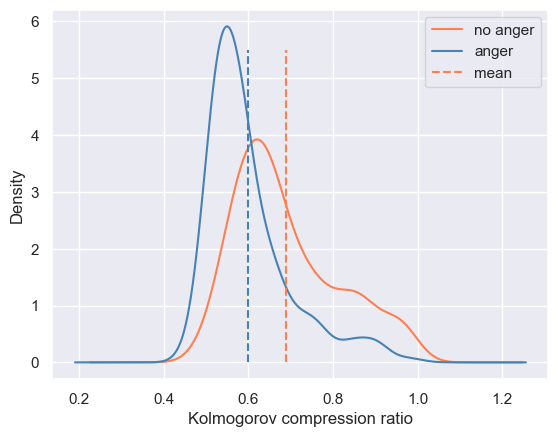

In [7]:
# Let us run a T-test to see if there is a significant difference between the mean KC of paragraphs
# with anger and those without. 

# We ignore paragraphs with a compression rate of 1/1 or higher. Those with higher compression ratios,
# the ones that actually *grow* in filesize when compressed, are all very short paragraphs (max. 24 words), would
# show artificial very high complexity as an artefact of the compression mechanism, not because they are
# actually complex paragraphs.
kolmor_no_anger = gul_data[ ( gul_data['anger'] == 0 ) & ( gul_data['kolmogorov_ratio'] < 1 ) ]['kolmogorov_ratio']
kolmor_anger = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['kolmogorov_ratio'] < 1 ) ]['kolmogorov_ratio']

# How is kolmogorov complexity distributed for paragraphs that show no anger?
ax = kolmor_no_anger.plot.density( c='coral', label='no anger' )
# And how is kolmogorov complexity distributed for paragraphs that do show anger?
kolmor_anger.plot.density( c='steelblue', label='anger' )

ax.vlines( [ kolmor_no_anger.mean(), kolmor_anger.mean() ], ymin=0, ymax=5.5, linestyles='dashed', colors=[ 'coral', 'steelblue' ], label='mean' )

ax.set_xlabel( 'Kolmogorov compression ratio' )
ax.legend()

print( f'Kolmogorov compression ratio of paragraphs not showing anger: {kolmor_no_anger.mean():.3f} (stdev: {kolmor_no_anger.std():.3f})' )
print( f'Kolmogorov compression ratio of paragraphs that do show anger: {kolmor_anger.mean():.3f} (stdev: {kolmor_anger.std():.3f})' )

# We use Welch's T-test, because we cannot readily assume equal variance in the samples.
stat, p_value = ttest_ind( kolmor_no_anger, kolmor_anger, equal_var=False )
print(f"Welch's T-test: statistic={stat:.4f}, p-value={p_value:.4e}")

# But just as a sanity check, what does the normalized T-test say?
stat, p_value = ttest_ind( kolmor_no_anger, kolmor_anger )
print( f'Student T-test: statistic={stat:.4f}, p-value={p_value:.4e}' )


In [70]:
# Saving figure
ax.get_figure().savefig( "./figures/fig_kolmogorov.png", dpi=300 )


The T-test statistic, the t-value or t-score, is a ratio of the difference between the mean of the two sample sets and the variation that exists within the sample sets. The larger the t-score the larger the difference between the mean and variation **(probability density)** of a set of samples.

The p-value measures the probability of obtaining the observed results, assuming that the samples sets derive from the same population, and thus can be explained by chance. The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant.

Here, the T-score is large and the p-value is extremely small. 

Conclusion: the mean compression ratio for paragraphs showing anger is significantly different from those showing no anger. But most essentially, the difference is *counter hypothesis 1*. We would have expected *higher* compression ratios for paragraphs with more anger words and higher complexity. Instead we find lower ones.

But might it still be true that there is a positive correlation between anger and complexity? KC appears to disprove hypothesis 1. Our next step is to investigate hypothesis 2: Even though complexity in non-anger paragrahs is generally larger, it could still be the case that the more anger is present in a paragraph, the more complex the word use is. We could show this using a linear regression.

In [8]:
# This is just a helper function to pretty print regression results.
def pretty_regression_summary( regression_results ):
    return f'''
    slope: {regression_results.slope:.4f}
intercept: {regression_results.intercept:.4f}
pearson r: {regression_results.rvalue:.4f}
R squared: {regression_results.rvalue**2:.4f}
  p-value: {regression_results.pvalue:.4e}
'''


    slope: 0.0402
intercept: 0.5290
pearson r: 0.6595
R squared: 0.4350
  p-value: 2.0164e-47



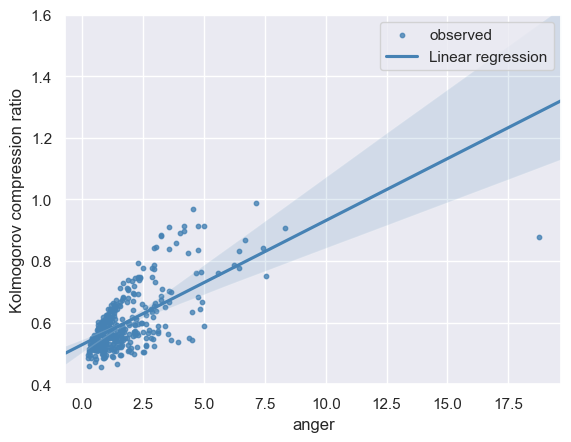

In [20]:
x = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['kolmogorov_ratio'] < 1 ) ]['anger']
y = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['kolmogorov_ratio'] < 1 ) ]['kolmogorov_ratio']

regr_results = linregress(x, y)
ax = sns.regplot( x=x, y=y, ci=95, order=1, 
                  line_kws={'label': 'Linear regression', 'color': 'steelblue'},
                  scatter_kws={'color': 'steelblue', 's':10 },
                  seed=1, truncate=False, label='observed' )
ax.set_ylabel( 'Kolmogorov compression ratio' )
ax.set_ylim( 0.4, 1.6 )
ax.legend()
print( pretty_regression_summary( regr_results ) )


The case is very clear. We find a very convincing correlation of 0.66 and a goodness of fit (R<sup>2</sup>) 0.44, while the p-value is extremely small.

Is the same true for the LIWC category 'negative emotion'?

In [21]:
# Saving figure
ax.get_figure().savefig( "./figures/fig_kolmo_linregr.png", dpi=300 )


Welch's T-test: statistic=18.1094, p-value=3.2342e-51

    slope: 0.0225
intercept: 0.5485
pearson r: 0.4575
R squared: 0.2093
  p-value: 3.0247e-31



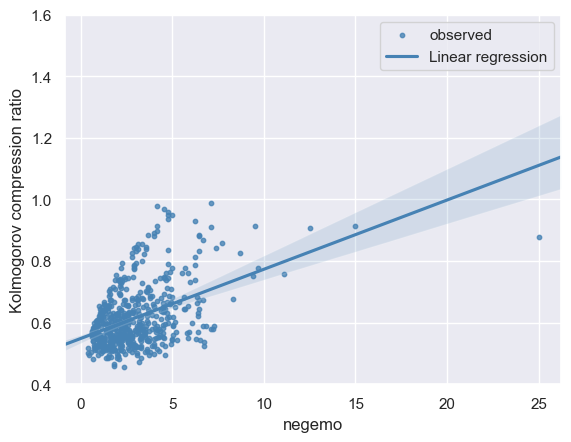

In [22]:
x = gul_data[ ( gul_data['negemo'] > 0 ) & ( gul_data['kolmogorov_ratio'] < 1 ) ]['negemo']
y = gul_data[ ( gul_data['negemo'] > 0 ) & ( gul_data['kolmogorov_ratio'] < 1 ) ]['kolmogorov_ratio']

regr_results = linregress(x, y)
ax = sns.regplot( x=x, y=y, ci=95, order=1, 
                  line_kws={'label': 'Linear regression', 'color': 'steelblue'},
                  scatter_kws={'color': 'steelblue', 's':10 },
                  seed=1, truncate=False, label='observed' )
ax.set_ylabel( 'Kolmogorov compression ratio' )
ax.set_ylim( 0.4, 1.6 )
ax.legend()

# Let's make sure we are ignoring zeros rightfully…
kolmor_no_negemo = gul_data[ gul_data['negemo'] == 0 ]['kolmogorov_ratio']
kolmor_negemo = y
stat, p_value = ttest_ind( kolmor_no_negemo, kolmor_negemo, equal_var=False )
print( f'Welch\'s T-test: statistic={stat:.4f}, p-value={p_value:.4e}' )

print( pretty_regression_summary( regr_results ) )


In [23]:
# Saving figure
ax.get_figure().savefig( "./figures/fig_kolmo_linregr_negemo.png", dpi=300 )


We find a nice p-value on the Welch's T-test, so the means for the Kolmogorov complexities of paragraphs with and those without negative emotion words are significantly different. However, again the difference is in the unexpected direction: paragraphs that do not have negative emotion words on average have higher **instesd** of lower complexity. Whe we look at the paragraphs that show negative emotions, we find a decent correlation of 0.62, and again an extremely small p-value. We find a lesser R<sup>2</sup>, but an acceptable one. 

So, based on Kolmogorov we have a mixed bag. On the one hand we see that on average complexity in non-anger and non-negtive emotion paragraphs is higher than in others, but there is a positive correlation between anger and complexity in those paragaphs that do show anger or words related to negative emotions.

## T-Scan

T-Scan provides two variables, LiNT1 and LiNT2, that generalize text complexity over a number of subvariables. We are now interested to know whether we see the same effects as with the Kolmogorov complexity approximation.

LiNT1 non anger paragraphs: 31.146 (stdev: 12.125)	LiNT2 non anger paragraphs: 29.520 (stdev: 14.277)
LiNT1 anger paragraohs: 36.452 (stdev: 8.938)		LiNT2 anger paragraohs: 37.002 (stdev: 9.903)
Welch's T-test: statistic=-7.5235, p-value=1.3042e-13	Welch's T-test: statistic=-9.2374, p-value=1.8187e-19
Welch's T-test: statistic=-7.1862, p-value=1.4089e-12	Welch's T-test: statistic=-8.7491, p-value=1.0631e-17


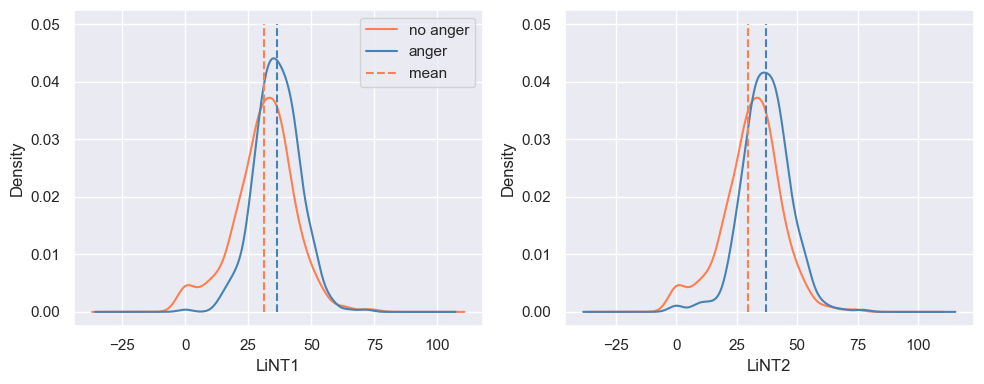

In [24]:
LiNT1_no_anger = gul_data[ gul_data['anger'] == 0 ]['LiNT_score1']
LiNT1_anger = gul_data[ gul_data['anger'] > 0 ]['LiNT_score1']
LiNT2_no_anger = gul_data[ gul_data['anger'] == 0 ]['LiNT_score2']
LiNT2_anger = gul_data[ gul_data['anger'] > 0 ]['LiNT_score2']

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(10,4))

LiNT1_no_anger.plot.density( c='coral', label='no anger', ax=ax1 )
LiNT1_anger.plot.density( c='steelblue', label='anger', ax=ax1 )
ax1.vlines( [ LiNT1_no_anger.mean(), LiNT1_anger.mean() ], ymin=0, ymax=0.05, linestyles='dashed', colors=[ 'coral', 'steelblue' ], label='mean' )
ax1.set_xlabel( 'LiNT1' )
ax1.legend()

ax2 = LiNT1_no_anger.plot.density( c='coral', label='no anger' )
LiNT2_anger.plot.density( c='steelblue', label='anger' )
ax2.vlines( [ LiNT2_no_anger.mean(), LiNT2_anger.mean() ], ymin=0, ymax=0.05, linestyles='dashed', colors=[ 'coral', 'steelblue' ], label='mean' )
ax2.set_xlabel( 'LiNT2' )

plt.tight_layout()

print( f'LiNT1 non anger paragraphs: {LiNT1_no_anger.mean():.3f} (stdev: {LiNT1_no_anger.std():.3f})\tLiNT2 non anger paragraphs: {LiNT2_no_anger.mean():.3f} (stdev: {LiNT2_no_anger.std():.3f})' )
print( f'LiNT1 anger paragraohs: {LiNT1_anger.mean():.3f} (stdev: {LiNT1_anger.std():.3f})\t\tLiNT2 anger paragraohs: {LiNT2_anger.mean():.3f} (stdev: {LiNT2_anger.std():.3f})' )

# We use Welch's T-test, because we cannot readily assume equal variance in the samples.
stat, p_value = ttest_ind( LiNT1_no_anger, LiNT1_anger, equal_var=False )
stat2, p_value2 = ttest_ind( LiNT2_no_anger, LiNT2_anger, equal_var=False )
print( f'Welch\'s T-test: statistic={stat:.4f}, p-value={p_value:.4e}\tWelch\'s T-test: statistic={stat2:.4f}, p-value={p_value2:.4e}' )

# But just as a sanity check, what does the normalized T-test say?
stat, p_value = ttest_ind( LiNT1_no_anger, LiNT1_anger )
stat2, p_value2 = ttest_ind( LiNT2_no_anger, LiNT2_anger )
print( f'Welch\'s T-test: statistic={stat:.4f}, p-value={p_value:.4e}\tWelch\'s T-test: statistic={stat2:.4f}, p-value={p_value2:.4e}' )


Note that in this case, a higher LiNT1 score means *more* complexity, whereas in the above Kolmogorov complexity approximation it is a *lower* compression ratio that means more complexity. Again we see that the means for paragraphs with and those without anger are statistically significantly different. But this time the difference *confirms* our first hypothesis: on average when looking at linguistic features, angry paragraphs show more complexity than paragraphs without anger-related words.

Then the next question is: do we find a positive correlation for paragraphs showing anger according to LIWC and complexity as determined by T-Scan? Again we can gauge this from a linear regression across those paragraphs showing anger.

In [95]:
# Saving figure
fig.savefig( "./figures/fig_LiNT_T-tests.png", dpi=300 )



    slope: -0.9924
intercept: 38.3256
pearson r: -0.2101
R squared: 0.0442
  p-value: 3.9169e-05


    slope: -1.0991
intercept: 39.0771
pearson r: -0.2100
R squared: 0.0441
  p-value: 3.9490e-05



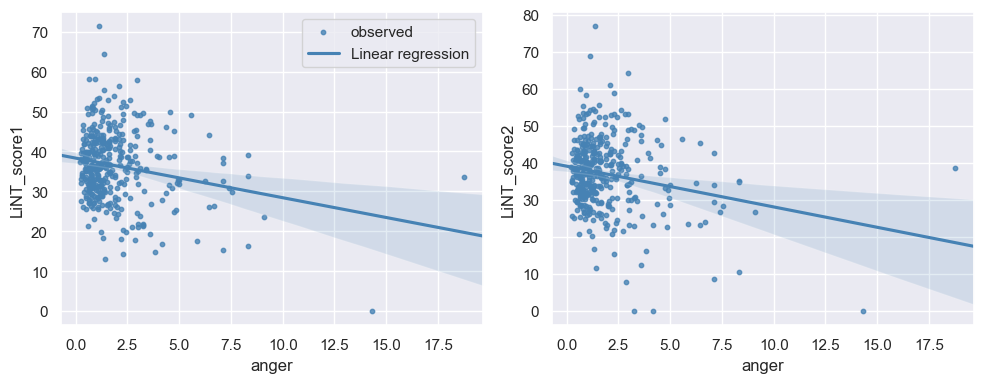

In [90]:
# So, do we see complexity increase if LiNT1 or 2 increases?

fig, ( ax1, ax2 ) = plt.subplots(1, 2, figsize=(10,4))

x = gul_data[ gul_data['anger'] > 0 ]['anger']
y = gul_data[ gul_data['anger'] > 0 ]['LiNT_score1']
regr_results = linregress(x, y)
sns.regplot( x=x, y=y, ci=95, order=1, 
             line_kws={'label': 'Linear regression', 'color': 'steelblue'},
             scatter_kws={'color': 'steelblue', 's':10 },
             seed=1, truncate=False, label='observed', ax=ax1 )
ax1.set_ylabel( 'LiNT_score1' )
ax1.legend()
print( pretty_regression_summary( regr_results ) )

x = gul_data[ gul_data['anger'] > 0 ]['anger']
y = gul_data[ gul_data['anger'] > 0 ]['LiNT_score2']
regr_results = linregress(x, y)
sns.regplot( x=x, y=y, ci=95, order=1, 
             line_kws={'label': 'Linear regression', 'color': 'steelblue'},
             scatter_kws={'color': 'steelblue', 's':10 },
             seed=1, truncate=False, label='observed', ax=ax2 )
ax2.set_ylabel( 'LiNT_score2' )
plt.tight_layout()

print( pretty_regression_summary( regr_results ) )

In [91]:
# Saving figure
fig.savefig( "./figures/fig_LiNT_linregr.png", dpi=300 )


Wow, such an opposite perspective! There's rather a negative correlation between anger and complexity, if there is any. Note however how R<sup>2</sup> in this case is at least an order of magnitude smaller. Which means that the Kolmogorov approximation technique has pretty good papers to be a better model for complexity related to anger. On the other hand: Kolmogorov complexity is not a linguistic-semantic notion but one based on information entropy.

So we really end up with a mixed bag. Based on T-testing we find a significant difference between angry and non-angry paragraphs both in favor (T-Scan) and opposed (Kolmogorov) to our first hypothesis. Whether one concludes that paragraphs that show anger are also more complex depends on which yardstick one trusts most: that of information theory (Kolmogorov) or that of linguistics (T-Scan). We tend to favor the linguistics-based method, as it is rooted in linguistic concepts of complexity which we believe are closer to conceptions of complexity from a literary studies point of view. However, the hypothesis about a positive correlation between anger and complexity in Gül's text then becomes untenable. We can only conclude that, on average, paragraphs showing anger are more complex linguistically, but there is no case to assume that when they are more agrier they are also more complex. In other words, if we privilige T-Scan-results over KC-results based on a preference for linguistic measures of complexity, we can support hypothesis 1 but not hypothesis 2.

There is one additional consideration: the developers of T-Scan regard all LiNT-values below 34 as non-complex. If we ignore all LiNT-values below 34, we get a slightly better positive correlation on LiNT1, as shown below.


    slope: 0.2868
intercept: 41.5576
pearson r: 0.0603
R squared: 0.0036
  p-value: 3.6609e-01


    slope: -0.0534
intercept: 42.8432
pearson r: -0.0140
R squared: 0.0002
  p-value: 8.3133e-01



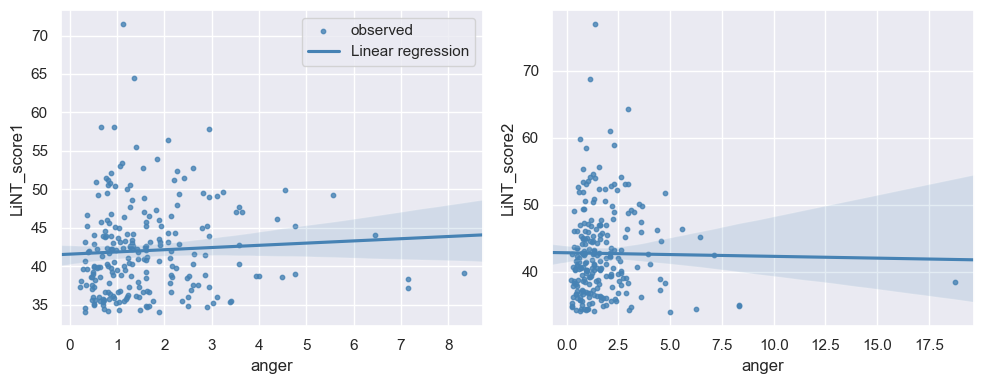

In [96]:
# So, do we see more complexity indeed too if LiNT1 or 2 increases?

fig, ( ax1, ax2 ) = plt.subplots(1, 2, figsize=(10,4))

x = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['LiNT_score1'] > 34 ) ]['anger']
y = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['LiNT_score1'] > 34 ) ]['LiNT_score1']
regr_results = linregress(x, y)
sns.regplot( x=x, y=y, ci=95, order=1, 
             line_kws={'label': 'Linear regression', 'color': 'steelblue'},
             scatter_kws={'color': 'steelblue', 's':10 },
             seed=1, truncate=False, label='observed', ax=ax1 )
ax1.set_ylabel( 'LiNT_score1' )
ax1.legend()
print( pretty_regression_summary( regr_results ) )

x = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['LiNT_score2'] > 34 ) ]['anger']
y = gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['LiNT_score2'] > 34 ) ]['LiNT_score2']
regr_results = linregress(x, y)
sns.regplot( x=x, y=y, ci=95, order=1, 
             line_kws={'label': 'Linear regression', 'color': 'steelblue'},
             scatter_kws={'color': 'steelblue', 's':10 },
             seed=1, truncate=False, label='observed', ax=ax2 )
ax2.set_ylabel( 'LiNT_score2' )
plt.tight_layout()

print( pretty_regression_summary( regr_results ) )

In [97]:
# Saving figure
fig.savefig( "./figures/fig_LiNT_linregr_34.png", dpi=300 )


So until now the conclusion as to the direction and strength of the correlation between anger and complexity is a mixed bag. According to the Kolmogorov complexity approximation, there is a clear positive correlation (supporting hypothesis 2). When we look at LiNT-scores, there at best a very weak relation. On the basis of simple T-testing we find linguistic evidence to support the hypothesis that angry paragraphs show more complexity, but Kolmogorov approximation results in evidence counter our hypothesis.

We can possibly corroborate these findings by looking at individual T-Scan variables. We consider the fifteen variables T-Scan documentation considers the most indicative for complexity.

In [111]:
features = [ 'wrd_freq_log_zn_corr', 'wrd_freq_zn_log', 'Conc_nw_ruim_p' ,'Conc_nw_strikt_p',
             'Alg_nw_d', 'Pers_ref_d', 'Pers_vnw_d', 'Wrd_per_zin', 'Wrd_per_dz', 'Inhwrd_dz_zonder_abw',
             'AL_max', 'Bijzin_per_zin', 'Bijv_bep_dz_zbijzin', 'Extra_KConj_dz', 'MTLD_inhwrd_zonder_abw' ]


# Print table header

# cell separating character
cs = '|'
# For pastign to other docs than txt
# cs = '\t'

print( f'{"feature".ljust(23)} {cs} {"no anger".rjust(7)} {cs} {"stdev".rjust(6)} {cs} {"anger".rjust(7)} {cs} {"stdev".rjust(6)} {cs} {"T-test".rjust(6)} {cs} {"p-value".rjust(9)} {cs} {"eff".rjust(4)} {cs} {"pcorr".rjust(6)} {cs} corrp' )
if cs=='|':
    print( '-'*110 )

# T-test and correlate all 15 selected T-Scan features to LIWC anger
for feature in features:

    feature_no_anger = gul_data[ gul_data['anger'] == 0 ][feature].dropna()
    feature_anger = gul_data[ gul_data['anger'] > 0 ][feature].dropna()

    # T-test
    stat, p_value = ttest_ind( feature_anger, feature_no_anger, equal_var=False )

    # Correlation
    correlate_anger = gul_data[ gul_data['anger'] > 0 ][[feature,'anger']].dropna()['anger']
    correlate_feature = gul_data[ gul_data['anger'] > 0 ][[feature,'anger']].dropna()[feature]
    pearson = pearsonr( correlate_feature, correlate_anger )
    
    feature_no_anger_mean = feature_no_anger.mean()
    feature_no_anger_stdev = feature_no_anger.std()
    feature_anger_mean = feature_anger.mean()
    feature_anger_stdev = feature_anger.std()

    # Effect?
    effect = 'no'
    if( ( feature_no_anger_mean < feature_anger_mean ) and ( p_value < 0.05 ) ):
        effect = 'yes'

    # The rest is just formatting
    # Convert to strings for table view
    stat = f'{stat:.2f}'
    p_value = f'{p_value:.2e}'
    feature_no_anger_mean = f'{feature_no_anger_mean:.2f}'
    feature_no_anger_stdev = f'{feature_no_anger_stdev:.2f}'
    feature_anger_mean = f'{feature_anger_mean:.2f}'
    feature_anger_stdev = f'{feature_anger_stdev:.2f}'
    pearson_statistic = f'{pearson.statistic:.2f}'
    pearson_pvalue = f'{pearson.pvalue:.2f}'
    table_row = '{} '*19
    print( table_row.format( 
                feature.ljust(23), cs, 
                feature_no_anger_mean.rjust(8), cs,
                feature_no_anger_stdev.rjust(6), cs,
                feature_anger_mean.rjust(7), cs,
                feature_anger_stdev.rjust(6), cs,
                stat.rjust(6), cs,
                p_value.rjust(9), cs,
                effect.rjust(4), cs,
                pearson_statistic.rjust(6), cs,
                pearson_pvalue.rjust(5)
            ) 
         )


feature                 | no anger |  stdev |   anger |  stdev | T-test |   p-value |  eff |  pcorr | corrp
--------------------------------------------------------------------------------------------------------------
wrd_freq_log_zn_corr    |     4.82 |   0.40 |    4.71 |   0.28 |  -4.83 |  1.64e-06 |   no |   0.05 |  0.38 
wrd_freq_zn_log         |     4.75 |   0.43 |    4.64 |   0.30 |  -4.58 |  5.20e-06 |   no |   0.08 |  0.13 
Conc_nw_ruim_p          |     0.61 |   0.27 |    0.49 |   0.20 |  -7.12 |  2.31e-12 |   no |  -0.01 |  0.77 
Conc_nw_strikt_p        |     0.47 |   0.29 |    0.37 |   0.19 |  -6.16 |  1.16e-09 |   no |   0.15 |  0.00 
Alg_nw_d                |    15.18 |  24.11 |   20.53 |  19.06 |   3.70 |  2.33e-04 |  yes |  -0.05 |  0.31 
Pers_ref_d              |   163.62 |  88.08 |  134.38 |  51.79 |  -6.21 |  8.30e-10 |   no |   0.17 |  0.00 
Pers_vnw_d              |   122.49 |  69.82 |  106.81 |  47.00 |  -4.01 |  6.68e-05 |   no |   0.02 |  0.69 
Wrd_per_zin       

There is a lot to unpack here. The first column lists the variable names. The following seven columns ("no anger" up to and including "eff") concern T-tests for each variable. Here, as in the tests above, we calculate if the mean of paragraphs showing "anger" is significantly ("p-value", <0.05) larger than of paragraphs showing "no anger". If so, we assume an effect (hence "yes" in the column "eff"). 

We also compute the correlation between anger values and feature scores ("pcorr") and their significance ("corrp").

The results are similar to what we found for LiNT. We find a majority of complexity features (9 out of 15) that score significantly higher when anger is detected in a paragraph. However, the question "Does *more* anger also lead to *more* complexity?" (hypothesis 2) remains elusive here as well. Correlations turn out to be mostly negative(!), weak at best (0.3), and in cases insignificant.

## Conclusion

On the basis of T-testing of Kolmogorov approximations there is reason to assume that Gül writes more complex language in paragraphs where anger-words are detected by LIWC. However, we assume that linguistics-based T-Scan provides better knowledge about a text's complexity than Kolmogorov approximations, partially because of the critique of KC offered by Nan Da (2020). This assumption should be tested and explored further.

When we use a Kolmogorov approximation of complexity, we can gauge that the more angry words are used in a paragraph, the more complex that parapgraph is. However, if we use a tool (T-Scan) that specifically looks at linguistic complexity, we cannot convincingly detect the same proportional relationship.

## Notes

The finding that Kolmogorov complexity ratio means for anger and non-anger paragraphs are significantly different but in the opposite direction from complexity means as determined by T-Scan is surprising. Even more surprising may be that this is pretty much *always* the case, as we can determine by comparing those means for whichever Kolmogorov complexity ratio threshold we set. In de chart below, we plot the means for compression ratios *up to* the x-axes values. The chart tells us that complexity (as approximated by Kolmogorov compression ratios) for pragraphs not showing anger is pretty much always higher than for paragraphs containing anger.

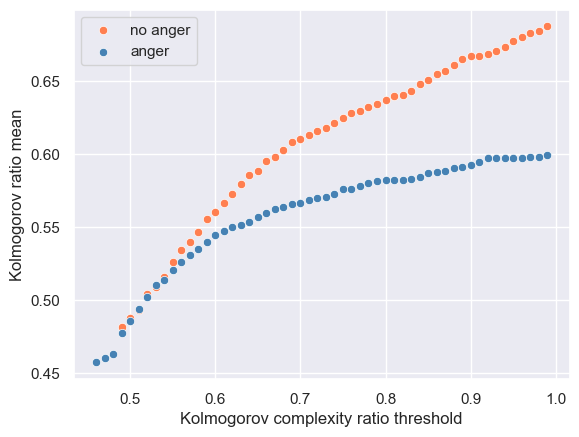

In [66]:
no_anger_means = []
anger_means = []
i_range = [ x / 100.0 for x in range(0, 100, 1) ]
for i in i_range:
    no_anger_means.append( gul_data[ ( gul_data['anger'] == 0 ) & ( gul_data['kolmogorov_ratio'] < i ) ]['kolmogorov_ratio'].mean() )
    anger_means.append( gul_data[ ( gul_data['anger'] > 0 ) & ( gul_data['kolmogorov_ratio'] < i ) ]['kolmogorov_ratio'].mean() )
ax = sns.scatterplot( x=i_range, y=no_anger_means, color='coral', label='no anger' )
sns.scatterplot( x=i_range, y=anger_means, color='steelblue', label='anger' )
ax.set( xlabel = 'Kolmogorov complexity ratio threshold', ylabel = 'Kolmogorov ratio mean' )
ax.legend()